In [2]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras

In [3]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

In [4]:
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [5]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [6]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))

Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.6721 - accuracy: 0.8476 - val_loss: 0.3364 - val_accuracy: 0.8805
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2937 - accuracy: 0.8945 - val_loss: 0.3103 - val_accuracy: 0.8924
Epoch 3/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2588 - accuracy: 0.9030 - val_loss: 0.3232 - val_accuracy: 0.8876
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2340 - accuracy: 0.9135 - val_loss: 0.3383 - val_accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2141 - accuracy: 0.9206 - val_loss: 0.3320 - val_accuracy: 0.8943
Epoch 6/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1971 - accuracy: 0.9263 - val_loss: 0.3445 - val_accuracy: 0.8919
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1822 - accuracy: 0.9316 - val_loss: 0.3345 -

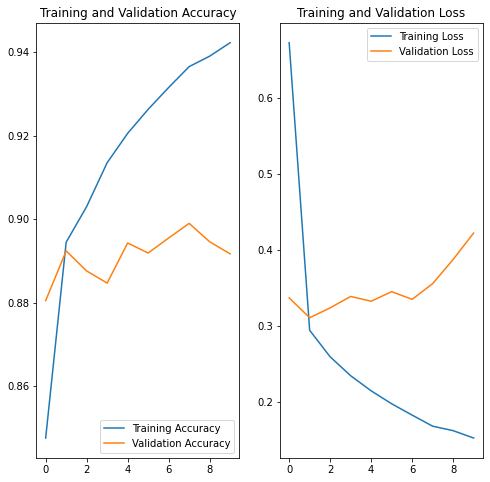

In [ ]:
# Network 1
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.7105 - accuracy: 0.8224 - val_loss: 0.4030 - val_accuracy: 0.8503
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3457 - accuracy: 0.8719 - val_loss: 0.3788 - val_accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3021 - accuracy: 0.8867 - val_loss: 0.3338 - val_accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2757 - accuracy: 0.8960 - val_loss: 0.3205 - val_accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2534 - accuracy: 0.9050 - val_loss: 0.3368 - val_accuracy: 0.8879
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2387 - accuracy: 0.9095 - val_loss: 0.3485 - val_accuracy: 0.8861
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2195 - accuracy: 0.9168 - val_loss: 0.3150 -

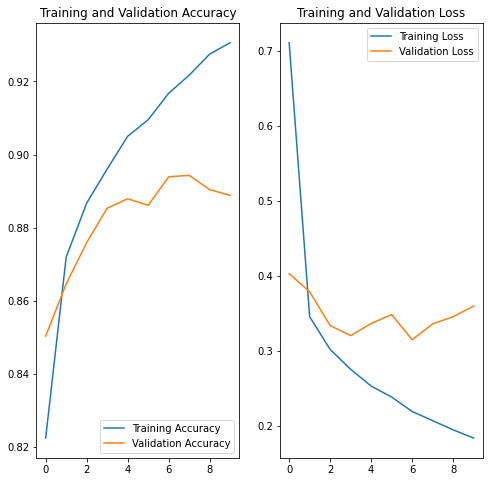

In [17]:
# Network 2
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/10
1875/1875 [==============================] - 79s 41ms/step - loss: 0.6211 - accuracy: 0.8010 - val_loss: 0.4607 - val_accuracy: 0.8319
Epoch 2/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.4011 - accuracy: 0.8520 - val_loss: 0.4917 - val_accuracy: 0.8272
Epoch 3/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.3563 - accuracy: 0.8685 - val_loss: 0.3786 - val_accuracy: 0.8664
Epoch 4/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3246 - accuracy: 0.8775 - val_loss: 0.3785 - val_accuracy: 0.8639
Epoch 5/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.3072 - accuracy: 0.8862 - val_loss: 0.4035 - val_accuracy: 0.8562
Epoch 6/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2878 - accuracy: 0.8924 - val_loss: 0.3514 - val_accuracy: 0.8764
Epoch 7/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2710 - accuracy: 0.8974 - val_loss: 0.3667 -

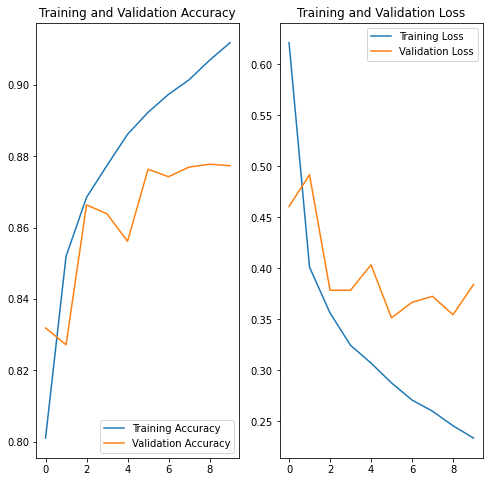

In [ ]:
# Network 3
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/10
1875/1875 [==============================] - 108s 57ms/step - loss: 0.6154 - accuracy: 0.8221 - val_loss: 0.3882 - val_accuracy: 0.8603
Epoch 2/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.3449 - accuracy: 0.8733 - val_loss: 0.3587 - val_accuracy: 0.8710
Epoch 3/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.3020 - accuracy: 0.8873 - val_loss: 0.3315 - val_accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.2777 - accuracy: 0.8960 - val_loss: 0.3368 - val_accuracy: 0.8794
Epoch 5/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.2594 - accuracy: 0.9015 - val_loss: 0.3158 - val_accuracy: 0.8868
Epoch 6/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.2410 - accuracy: 0.9093 - val_loss: 0.3205 - val_accuracy: 0.8910
Epoch 7/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.2256 - accuracy: 0.9139 - val_loss: 0

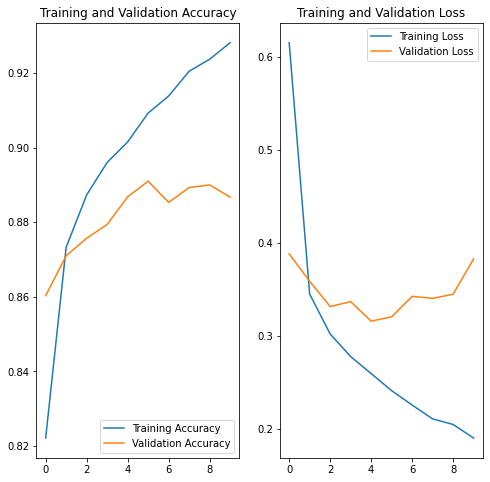

In [ ]:
# Variation 1
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.6091 - accuracy: 0.8186 - val_loss: 0.4267 - val_accuracy: 0.8469
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3539 - accuracy: 0.8698 - val_loss: 0.3390 - val_accuracy: 0.8744
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3190 - accuracy: 0.8803 - val_loss: 0.3445 - val_accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2922 - accuracy: 0.8903 - val_loss: 0.3360 - val_accuracy: 0.8820
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2726 - accuracy: 0.8975 - val_loss: 0.3514 - val_accuracy: 0.8794
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2625 - accuracy: 0.9020 - val_loss: 0.3211 - val_accuracy: 0.8891
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2439 - accuracy: 0.9083 - val_loss: 0.3321 -

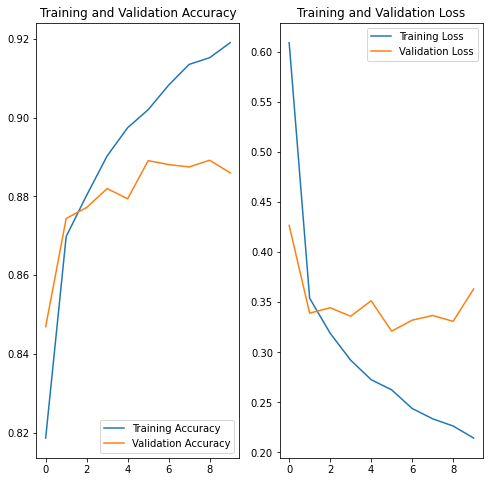

In [ ]:
# Variation 2
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.5379 - accuracy: 0.8374 - val_loss: 0.3575 - val_accuracy: 0.8757
Epoch 2/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.3165 - accuracy: 0.8838 - val_loss: 0.3366 - val_accuracy: 0.8771
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2843 - accuracy: 0.8959 - val_loss: 0.3268 - val_accuracy: 0.8836
Epoch 4/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2636 - accuracy: 0.9024 - val_loss: 0.3073 - val_accuracy: 0.8928
Epoch 5/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2447 - accuracy: 0.9098 - val_loss: 0.3498 - val_accuracy: 0.8794
Epoch 6/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2313 - accuracy: 0.9130 - val_loss: 0.3100 - val_accuracy: 0.8912
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2157 - accuracy: 0.9203 - val_loss: 0.3213 -

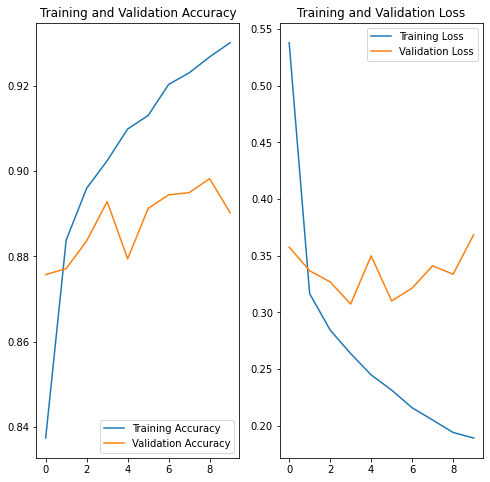

In [ ]:
# Variation 3
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/10
1875/1875 [==============================] - 71s 37ms/step - loss: 0.6656 - accuracy: 0.8293 - val_loss: 0.3771 - val_accuracy: 0.8639
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3298 - accuracy: 0.8777 - val_loss: 0.3555 - val_accuracy: 0.8732
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2932 - accuracy: 0.8910 - val_loss: 0.3241 - val_accuracy: 0.8838
Epoch 4/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2702 - accuracy: 0.8984 - val_loss: 0.3205 - val_accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2465 - accuracy: 0.9076 - val_loss: 0.3073 - val_accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2272 - accuracy: 0.9155 - val_loss: 0.3349 - val_accuracy: 0.8891
Epoch 7/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2118 - accuracy: 0.9207 - val_loss: 0.3358 -

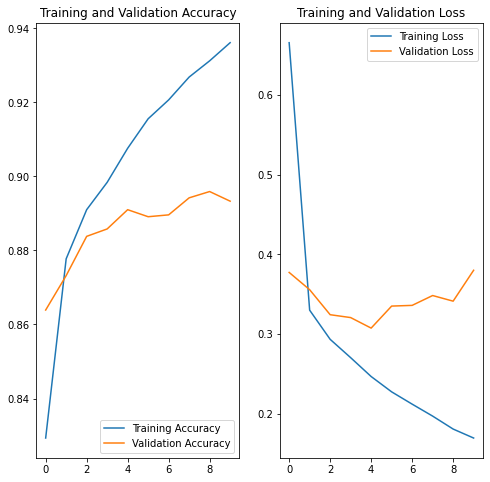

In [ ]:
# Variation 4
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Epoch 1/10
1875/1875 [==============================] - 73s 38ms/step - loss: 0.5727 - accuracy: 0.8237 - val_loss: 0.3862 - val_accuracy: 0.8621
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3315 - accuracy: 0.8778 - val_loss: 0.3562 - val_accuracy: 0.8683
Epoch 3/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2934 - accuracy: 0.8915 - val_loss: 0.3162 - val_accuracy: 0.8915
Epoch 4/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2677 - accuracy: 0.9012 - val_loss: 0.3489 - val_accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2441 - accuracy: 0.9090 - val_loss: 0.3141 - val_accuracy: 0.8894
Epoch 6/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2256 - accuracy: 0.9160 - val_loss: 0.2933 - val_accuracy: 0.9026
Epoch 7/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2099 - accuracy: 0.9213 - val_loss: 0.3125 -

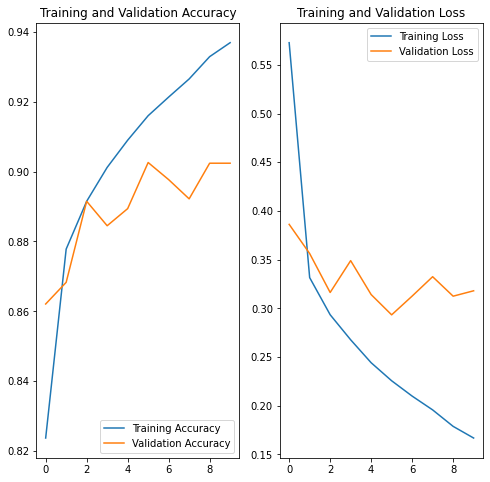

In [ ]:
# Variation 5
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Epoch 1/10
1875/1875 [==============================] - 97s 51ms/step - loss: 0.4940 - accuracy: 0.8459 - val_loss: 0.3455 - val_accuracy: 0.8747
Epoch 2/10
1875/1875 [==============================] - 91s 48ms/step - loss: 0.3068 - accuracy: 0.8878 - val_loss: 0.3644 - val_accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.2747 - accuracy: 0.8983 - val_loss: 0.3171 - val_accuracy: 0.8878
Epoch 4/10
1875/1875 [==============================] - 91s 49ms/step - loss: 0.2449 - accuracy: 0.9082 - val_loss: 0.2929 - val_accuracy: 0.8941
Epoch 5/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2217 - accuracy: 0.9182 - val_loss: 0.3175 - val_accuracy: 0.8866
Epoch 6/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.1993 - accuracy: 0.9251 - val_loss: 0.3020 - val_accuracy: 0.8948
Epoch 7/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1822 - accuracy: 0.9321 - val_loss: 0.3220 -

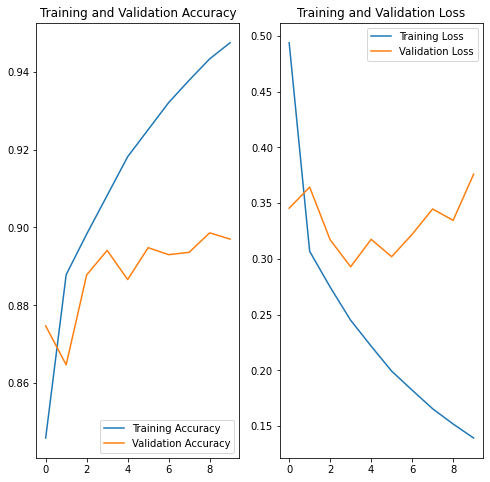

In [ ]:
# Variation 6
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Epoch 1/10
1875/1875 [==============================] - 77s 40ms/step - loss: 0.5561 - accuracy: 0.8372 - val_loss: 0.3441 - val_accuracy: 0.8703
Epoch 2/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3119 - accuracy: 0.8838 - val_loss: 0.3491 - val_accuracy: 0.8701
Epoch 3/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2778 - accuracy: 0.8943 - val_loss: 0.3053 - val_accuracy: 0.8907
Epoch 4/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2515 - accuracy: 0.9054 - val_loss: 0.3251 - val_accuracy: 0.8927
Epoch 5/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.2296 - accuracy: 0.9143 - val_loss: 0.3576 - val_accuracy: 0.8796
Epoch 6/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2126 - accuracy: 0.9196 - val_loss: 0.3122 - val_accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1921 - accuracy: 0.9276 - val_loss: 0.3456 -

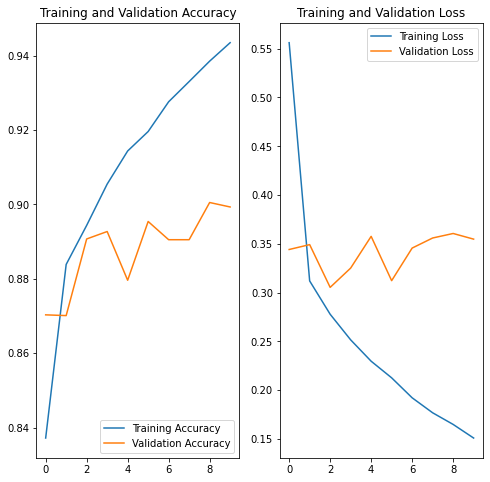

In [ ]:
# Variation 7
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(400, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Epoch 1/10
1875/1875 [==============================] - 76s 40ms/step - loss: 2.1879 - accuracy: 0.7816 - val_loss: 0.5383 - val_accuracy: 0.8117
Epoch 2/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.4745 - accuracy: 0.8300 - val_loss: 0.4609 - val_accuracy: 0.8350
Epoch 3/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.4054 - accuracy: 0.8526 - val_loss: 0.4607 - val_accuracy: 0.8368
Epoch 4/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.3594 - accuracy: 0.8677 - val_loss: 0.3644 - val_accuracy: 0.8670
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3100 - accuracy: 0.8868 - val_loss: 0.3510 - val_accuracy: 0.8794
Epoch 6/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2796 - accuracy: 0.8974 - val_loss: 0.3449 - val_accuracy: 0.8849
Epoch 7/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2552 - accuracy: 0.9064 - val_loss: 0.3118 -

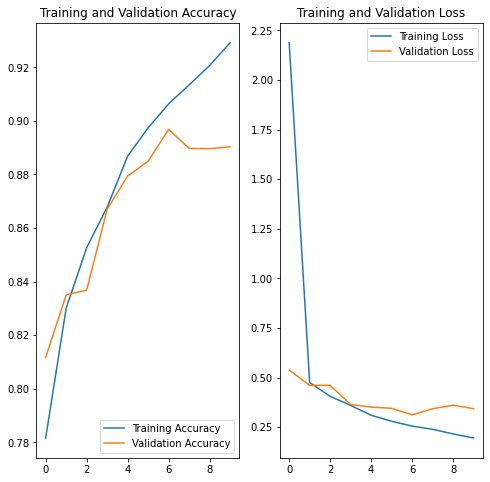

In [ ]:
# Variation 7
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(400, activation='relu'))
model.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Epoch 1/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.5297 - accuracy: 0.8334 - val_loss: 0.4143 - val_accuracy: 0.8521
Epoch 2/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.3235 - accuracy: 0.8802 - val_loss: 0.3583 - val_accuracy: 0.8688
Epoch 3/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2926 - accuracy: 0.8912 - val_loss: 0.3474 - val_accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2584 - accuracy: 0.9025 - val_loss: 0.3196 - val_accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2368 - accuracy: 0.9108 - val_loss: 0.3290 - val_accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2217 - accuracy: 0.9175 - val_loss: 0.3240 - val_accuracy: 0.8937
Epoch 7/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1982 - accuracy: 0.9244 - val_loss: 0.3113 -

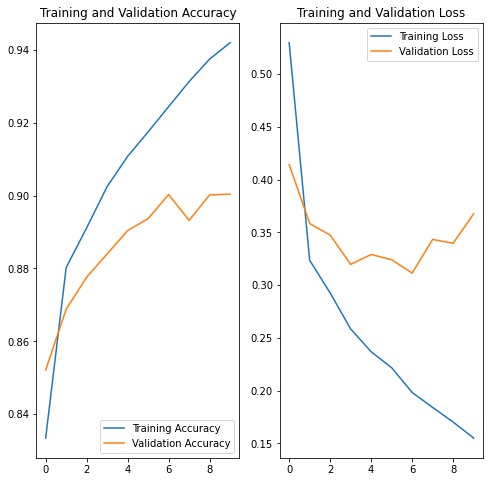

In [ ]:
# Variation 8
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Epoch 1/10
1875/1875 [==============================] - 84s 44ms/step - loss: 0.6139 - accuracy: 0.8300 - val_loss: 0.3977 - val_accuracy: 0.8547
Epoch 2/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3230 - accuracy: 0.8810 - val_loss: 0.3717 - val_accuracy: 0.8702
Epoch 3/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2869 - accuracy: 0.8940 - val_loss: 0.3227 - val_accuracy: 0.8848
Epoch 4/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.2633 - accuracy: 0.9014 - val_loss: 0.3079 - val_accuracy: 0.8923
Epoch 5/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2381 - accuracy: 0.9106 - val_loss: 0.3138 - val_accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2211 - accuracy: 0.9183 - val_loss: 0.3389 - val_accuracy: 0.8878
Epoch 7/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2041 - accuracy: 0.9235 - val_loss: 0.3228 -

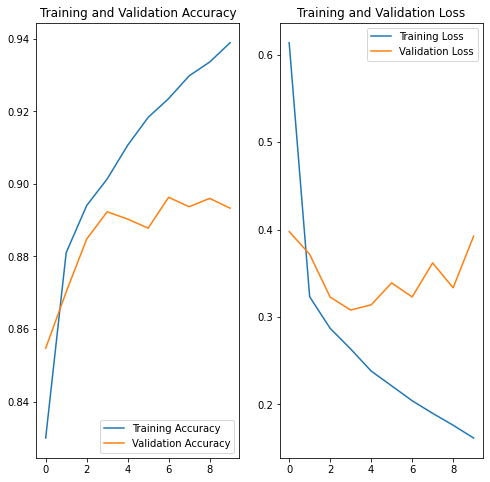

In [ ]:
# Variation 9
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(600, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Epoch 1/10
1875/1875 [==============================] - 232s 123ms/step - loss: 0.5859 - accuracy: 0.8350 - val_loss: 0.3503 - val_accuracy: 0.8746
Epoch 2/10
1875/1875 [==============================] - 226s 121ms/step - loss: 0.3093 - accuracy: 0.8853 - val_loss: 0.3111 - val_accuracy: 0.8899
Epoch 3/10
1875/1875 [==============================] - 226s 120ms/step - loss: 0.2786 - accuracy: 0.8971 - val_loss: 0.3545 - val_accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 225s 120ms/step - loss: 0.2540 - accuracy: 0.9053 - val_loss: 0.3298 - val_accuracy: 0.8825
Epoch 5/10
1875/1875 [==============================] - 227s 121ms/step - loss: 0.2379 - accuracy: 0.9126 - val_loss: 0.3207 - val_accuracy: 0.8933
Epoch 6/10
1875/1875 [==============================] - 226s 121ms/step - loss: 0.2188 - accuracy: 0.9186 - val_loss: 0.3187 - val_accuracy: 0.8929
Epoch 7/10
1875/1875 [==============================] - 226s 121ms/step - loss: 0.2076 - accuracy: 0.9218 - val_

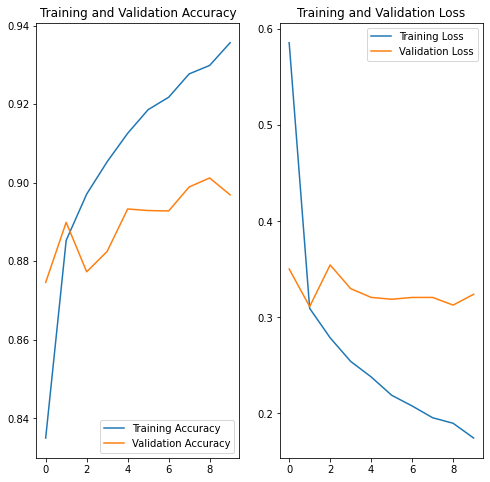

In [ ]:
# Variation 10
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (7, 7), padding = "same",activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


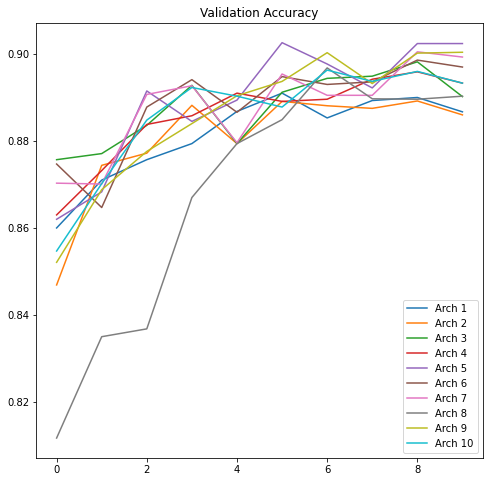

In [14]:
epochs_range = range(10)
plt.figure(figsize=(8, 8))

plt.plot(epochs_range, val_acc1, label='Arch 1')
plt.plot(epochs_range, val_acc2,label='Arch 2')
plt.plot(epochs_range, val_acc3, label='Arch 3')
plt.plot(epochs_range, val_acc4, label='Arch 4')
plt.plot(epochs_range, val_acc5,label='Arch 5')
plt.plot(epochs_range, val_acc6, label='Arch 6')
plt.plot(epochs_range, val_acc7, label='Arch 7')
plt.plot(epochs_range, val_acc8, label='Arch 8')
plt.plot(epochs_range, val_acc9, label='Arch 9')
plt.plot(epochs_range, val_acc10, label='Arch 10')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.show()


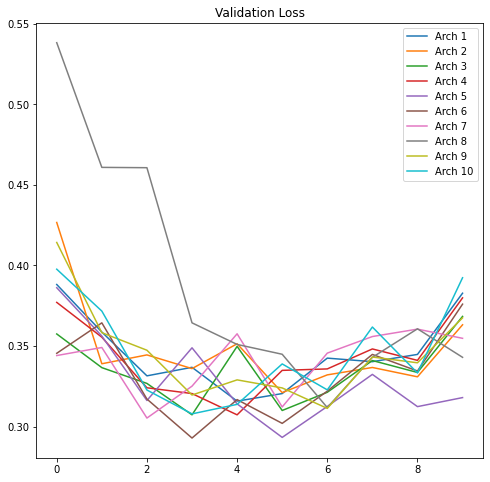

In [15]:
epochs_range = range(10)
plt.figure(figsize=(8, 8))

plt.plot(epochs_range, val_loss1, label='Arch 1')
plt.plot(epochs_range, val_loss2,label='Arch 2')
plt.plot(epochs_range, val_loss3, label='Arch 3')
plt.plot(epochs_range, val_loss4, label='Arch 4')
plt.plot(epochs_range, val_loss5,label='Arch 5')
plt.plot(epochs_range, val_loss6, label='Arch 6')
plt.plot(epochs_range, val_loss7, label='Arch 7')
plt.plot(epochs_range, val_loss8, label='Arch 8')
plt.plot(epochs_range, val_loss9, label='Arch 9')
plt.plot(epochs_range, val_loss10, label='Arch 10')
plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.show()
